The Beureau of Justice Department provides data on prison population. We acquired a downloadable CSV from their website containing year-end prison population count (total jurisdiction population) detailed by state and year. Lets examine it:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import config
import mysql.connector
%matplotlib inline

Import an excel file, rename/drop some columns/rows to get it into a workable format

In [3]:
pop = pd.read_excel('QT_total jurisdiction count_total.xlsx', header=9)

In [4]:
pop.drop(index=[0,1,2], inplace=True)

In [5]:
pop.drop(columns='Jurisdiction', inplace=True)

In [6]:
pop.rename(columns={'Unnamed: 1' : 'States'}, inplace=True)

In [7]:
pop.drop(index=list(range(54,64)), inplace=True)

In [8]:
pop.tail(12)

,States,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
42,RI,664.0,738.0,813.0,962.0,1037.0,1157.0,1221.0,1306.0,1358.0,...,4018,4045,3674,3357,3337,3318,3361,3359,3248,3103
43,SC,7536.0,7643.0,7862.0,8538.0,9137.0,9576.0,9892.0,10510.0,11676.0,...,24239,24326,24288,23578,22914,22388,22060,21401,20929,20858
44,SD,532.0,562.0,635.0,693.0,791.0,826.0,921.0,1049.0,1081.0,...,3311,3342,3434,3434,3535,3650,3682,3608,3564,3831
45,TN,5835.0,6629.0,7022.0,7897.0,7869.0,8201.0,7307.0,7127.0,7591.0,...,26267,27228,26965,27451,28479,28411,28521,28769,28172,28203
46,TX,24575.0,26522.0,29892.0,31502.0,36149.0,35259.0,36682.0,37532.0,38534.0,...,171790,172506,171249,173649,172224,166372,168280,166043,163909,163703
47,UT,911.0,960.0,932.0,1140.0,1216.0,1274.0,1504.0,1633.0,1776.0,...,6515,6552,6538,6807,6879,6962,7077,7031,6495,6182
48,VT,441.0,431.0,480.0,534.0,599.0,497.0,501.0,677.0,697.0,...,2116,2116,2220,2079,2053,2034,2078,1979,1750,1735
49,VA,8344.0,8449.0,8920.0,9388.0,10079.0,10093.0,10839.0,12073.0,12930.0,...,37984,38216,38059,37638,38130,37044,36982,37544,38403,37813
50,WA,4487.0,4342.0,4399.0,5336.0,6264.0,6658.0,6821.0,6919.0,6603.0,...,17772,17926,18233,18235,17847,17271,17984,18120,18284,19104
51,WV,1237.0,1251.0,1257.0,1565.0,1547.0,1611.0,1579.0,1725.0,1472.0,...,6056,6059,6367,6681,6826,7070,6824,6896,7118,7162


In [19]:
# pop_2016 = pop.iloc[-1]
# pop_2016

States      WY
1978       433
1979       504
1980       534
1981       556
1982       702
1983       721
1984       724
1985       762
1986       861
1987       916
1988       945
1989      1026
1990      1110
1991      1099
1992      1063
1993      1129
1994      1217
1995      1395
1996      1477
1997      1549
1998      1571
1999      1710
2000      1680
2001      1684
2002      1737
2003      1872
2004      1980
2005      2047
2006      2114
2007      2084
2008      2084
2009      2075
2010      2112
2011      2183
2012      2204
2013      2310
2014      2383
2015      2424
2016      2374
Name: 53, dtype: object

In [21]:
# list_of_yrs = pop.columns
# list_of_yrs = list_of_yrs[1:]
# listt_of_yrs = list(list_of_yrs)

In [22]:
# transpose the table to prepare it for excel
transposed_pop = pop.melt(id_vars='States', value_vars=list_of_yrs)

In [23]:
transposed_pop.head()

,States,variable,value
0,AL,1978,5625
1,AK,1978,712
2,AZ,1978,3456
3,AR,1978,2654
4,CA,1978,21325


In [24]:
transposed_pop.iloc[10]['States']

'GA'

In [31]:
# transposed_pop_2016 = transposed_pop.loc[transposed_pop['variable'] == 2016]

In [35]:
# listt = list(transposed_pop_2016['value'])
# print(listt)

[28883, 4434, 42320, 17537, 130390, 19981, 14957, 6585, '--', 99974, 53627, 5602, 8252, 43657, 25546, 9031, 9920, 23022, 35682, 2404, 19994, 9403, 41122, 10592, 19192, 32461, 3814, 5302, 13757, 2818, 19786, 7055, 50716, 35697, 1791, 52175, 28231, 15166, 49244, 3103, 20858, 3831, 28203, 163703, 6182, 1735, 37813, 19104, 7162, 23377, 2374]


In [36]:
# transposed_pop_2016

,States,variable,value
1938,AL,2016,28883
1939,AK,2016,4434
1940,AZ,2016,42320
1941,AR,2016,17537
1942,CA,2016,130390
1943,CO,2016,19981
1944,CT,2016,14957
1945,DE,2016,6585
1946,DC,2016,--
1947,FL,2016,99974


In [71]:
# for index, row in pop.iterrows():
#     print(index)


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53


In [89]:
# create a list of tuples to insert into the database 
list_of_tuples = []
for index, row in transposed_pop.iterrows():
    state_year_pk = transposed_pop.iloc[index]['States'] + str(transposed_pop.iloc[index]['variable'])
    prison_population_count = transposed_pop.iloc[index]['value']
    entry_tuple = (state_year_pk, prison_population_count)
    list_of_tuples.append(entry_tuple)

In [90]:
list_of_tuples

[('AL1978', 5625.0),
 ('AK1978', 712.0),
 ('AZ1978', 3456.0),
 ('AR1978', 2654.0),
 ('CA1978', 21325.0),
 ('CO1978', 2486.0),
 ('CT1978', 3189.0),
 ('DE1978', 1325.0),
 ('DC1978', 2864.0),
 ('FL1978', 21436.0),
 ('GA1978', 11317.0),
 ('HI1978', 727.0),
 ('ID1978', 802.0),
 ('IL1978', 11258.0),
 ('IN1978', 4923.0),
 ('IA1978', 1982.0),
 ('KS1978', 2341.0),
 ('KY1978', 3390.0),
 ('LA1978', 7291.0),
 ('ME1978', 711.0),
 ('MD1978', 7966.0),
 ('MA1978', 2806.0),
 ('MI1978', 14944.0),
 ('MN1978', 1954.0),
 ('MS1978', 2896.0),
 ('MO1978', 5637.0),
 ('MT1978', 690.0),
 ('NE1978', 1347.0),
 ('NV1978', 1350.0),
 ('NH1978', 283.0),
 ('NJ1978', 5869.0),
 ('NM1978', 1593.0),
 ('NY1978', 20459.0),
 ('NC1978', 13252.0),
 ('ND1978', 200.0),
 ('OH1978', 13107.0),
 ('OK1978', 4186.0),
 ('OR1978', 2879.0),
 ('PA1978', 7814.0),
 ('RI1978', 664.0),
 ('SC1978', 7536.0),
 ('SD1978', 532.0),
 ('TN1978', 5835.0),
 ('TX1978', 24575.0),
 ('UT1978', 911.0),
 ('VT1978', 441.0),
 ('VA1978', 8344.0),
 ('WA1978', 448

In [77]:
db_name = 'mod3_eda'

In [81]:
# Create a connection
cnx = mysql.connector.connect(
    host = config.host,
    user = 'admin',
    passwd = config.password,
    database = db_name
)

In [82]:
# Create / close cursor
cursor = cnx.cursor()
# cursor.close()

In [83]:
# define a sql query to create the table
table_description = ("""
CREATE TABLE IF NOT EXISTS prison_population_data (
    year_state_key VARCHAR(255) NOT NULL PRIMARY KEY,
    prison_population_count FLOAT NOT NULL
)  ENGINE=INNODB;
""")

In [84]:
# query to insert a row of data into the table
pop_table_query = """INSERT INTO prison_population_data
    (year_state_key, prison_population_count)
    VALUES (%s, %s)"""

In [85]:
# Function to insert results into a table based on the given query
def db_insert(data, table_qry):
    for n in range(0, len(data)):
        cursor.execute(table_qry, data[n])
        print(f'inserted a row for {n} row in results')

In [86]:
cursor.execute(table_description)

In [91]:
db_insert(list_of_tuples, pop_table_query)

inserted a row for 0 row in results
inserted a row for 1 row in results
inserted a row for 2 row in results
inserted a row for 3 row in results
inserted a row for 4 row in results
inserted a row for 5 row in results
inserted a row for 6 row in results
inserted a row for 7 row in results
inserted a row for 8 row in results
inserted a row for 9 row in results
inserted a row for 10 row in results
inserted a row for 11 row in results
inserted a row for 12 row in results
inserted a row for 13 row in results
inserted a row for 14 row in results
inserted a row for 15 row in results
inserted a row for 16 row in results
inserted a row for 17 row in results
inserted a row for 18 row in results
inserted a row for 19 row in results
inserted a row for 20 row in results
inserted a row for 21 row in results
inserted a row for 22 row in results
inserted a row for 23 row in results
inserted a row for 24 row in results
inserted a row for 25 row in results
inserted a row for 26 row in results
inserted a 

inserted a row for 232 row in results
inserted a row for 233 row in results
inserted a row for 234 row in results
inserted a row for 235 row in results
inserted a row for 236 row in results
inserted a row for 237 row in results
inserted a row for 238 row in results
inserted a row for 239 row in results
inserted a row for 240 row in results
inserted a row for 241 row in results
inserted a row for 242 row in results
inserted a row for 243 row in results
inserted a row for 244 row in results
inserted a row for 245 row in results
inserted a row for 246 row in results
inserted a row for 247 row in results
inserted a row for 248 row in results
inserted a row for 249 row in results
inserted a row for 250 row in results
inserted a row for 251 row in results
inserted a row for 252 row in results
inserted a row for 253 row in results
inserted a row for 254 row in results
inserted a row for 255 row in results
inserted a row for 256 row in results
inserted a row for 257 row in results
inserted a r

inserted a row for 448 row in results
inserted a row for 449 row in results
inserted a row for 450 row in results
inserted a row for 451 row in results
inserted a row for 452 row in results
inserted a row for 453 row in results
inserted a row for 454 row in results
inserted a row for 455 row in results
inserted a row for 456 row in results
inserted a row for 457 row in results
inserted a row for 458 row in results
inserted a row for 459 row in results
inserted a row for 460 row in results
inserted a row for 461 row in results
inserted a row for 462 row in results
inserted a row for 463 row in results
inserted a row for 464 row in results
inserted a row for 465 row in results
inserted a row for 466 row in results
inserted a row for 467 row in results
inserted a row for 468 row in results
inserted a row for 469 row in results
inserted a row for 470 row in results
inserted a row for 471 row in results
inserted a row for 472 row in results
inserted a row for 473 row in results
inserted a r

inserted a row for 668 row in results
inserted a row for 669 row in results
inserted a row for 670 row in results
inserted a row for 671 row in results
inserted a row for 672 row in results
inserted a row for 673 row in results
inserted a row for 674 row in results
inserted a row for 675 row in results
inserted a row for 676 row in results
inserted a row for 677 row in results
inserted a row for 678 row in results
inserted a row for 679 row in results
inserted a row for 680 row in results
inserted a row for 681 row in results
inserted a row for 682 row in results
inserted a row for 683 row in results
inserted a row for 684 row in results
inserted a row for 685 row in results
inserted a row for 686 row in results
inserted a row for 687 row in results
inserted a row for 688 row in results
inserted a row for 689 row in results
inserted a row for 690 row in results
inserted a row for 691 row in results
inserted a row for 692 row in results
inserted a row for 693 row in results
inserted a r

inserted a row for 893 row in results
inserted a row for 894 row in results
inserted a row for 895 row in results
inserted a row for 896 row in results
inserted a row for 897 row in results
inserted a row for 898 row in results
inserted a row for 899 row in results
inserted a row for 900 row in results
inserted a row for 901 row in results
inserted a row for 902 row in results
inserted a row for 903 row in results
inserted a row for 904 row in results
inserted a row for 905 row in results
inserted a row for 906 row in results
inserted a row for 907 row in results
inserted a row for 908 row in results
inserted a row for 909 row in results
inserted a row for 910 row in results
inserted a row for 911 row in results
inserted a row for 912 row in results
inserted a row for 913 row in results
inserted a row for 914 row in results
inserted a row for 915 row in results
inserted a row for 916 row in results
inserted a row for 917 row in results
inserted a row for 918 row in results
inserted a r

inserted a row for 1117 row in results
inserted a row for 1118 row in results
inserted a row for 1119 row in results
inserted a row for 1120 row in results
inserted a row for 1121 row in results
inserted a row for 1122 row in results
inserted a row for 1123 row in results
inserted a row for 1124 row in results
inserted a row for 1125 row in results
inserted a row for 1126 row in results
inserted a row for 1127 row in results
inserted a row for 1128 row in results
inserted a row for 1129 row in results
inserted a row for 1130 row in results
inserted a row for 1131 row in results
inserted a row for 1132 row in results
inserted a row for 1133 row in results
inserted a row for 1134 row in results
inserted a row for 1135 row in results
inserted a row for 1136 row in results
inserted a row for 1137 row in results
inserted a row for 1138 row in results
inserted a row for 1139 row in results
inserted a row for 1140 row in results
inserted a row for 1141 row in results
inserted a row for 1142 r

inserted a row for 1332 row in results
inserted a row for 1333 row in results
inserted a row for 1334 row in results
inserted a row for 1335 row in results
inserted a row for 1336 row in results
inserted a row for 1337 row in results
inserted a row for 1338 row in results
inserted a row for 1339 row in results
inserted a row for 1340 row in results
inserted a row for 1341 row in results
inserted a row for 1342 row in results
inserted a row for 1343 row in results
inserted a row for 1344 row in results
inserted a row for 1345 row in results
inserted a row for 1346 row in results
inserted a row for 1347 row in results
inserted a row for 1348 row in results
inserted a row for 1349 row in results
inserted a row for 1350 row in results
inserted a row for 1351 row in results
inserted a row for 1352 row in results
inserted a row for 1353 row in results
inserted a row for 1354 row in results
inserted a row for 1355 row in results
inserted a row for 1356 row in results
inserted a row for 1357 r

inserted a row for 1554 row in results
inserted a row for 1555 row in results
inserted a row for 1556 row in results
inserted a row for 1557 row in results
inserted a row for 1558 row in results
inserted a row for 1559 row in results
inserted a row for 1560 row in results
inserted a row for 1561 row in results
inserted a row for 1562 row in results
inserted a row for 1563 row in results
inserted a row for 1564 row in results
inserted a row for 1565 row in results
inserted a row for 1566 row in results
inserted a row for 1567 row in results
inserted a row for 1568 row in results
inserted a row for 1569 row in results
inserted a row for 1570 row in results
inserted a row for 1571 row in results
inserted a row for 1572 row in results
inserted a row for 1573 row in results
inserted a row for 1574 row in results
inserted a row for 1575 row in results
inserted a row for 1576 row in results
inserted a row for 1577 row in results
inserted a row for 1578 row in results
inserted a row for 1579 r

inserted a row for 1765 row in results
inserted a row for 1766 row in results
inserted a row for 1767 row in results
inserted a row for 1768 row in results
inserted a row for 1769 row in results
inserted a row for 1770 row in results
inserted a row for 1771 row in results
inserted a row for 1772 row in results
inserted a row for 1773 row in results
inserted a row for 1774 row in results
inserted a row for 1775 row in results
inserted a row for 1776 row in results
inserted a row for 1777 row in results
inserted a row for 1778 row in results
inserted a row for 1779 row in results
inserted a row for 1780 row in results
inserted a row for 1781 row in results
inserted a row for 1782 row in results
inserted a row for 1783 row in results
inserted a row for 1784 row in results
inserted a row for 1785 row in results
inserted a row for 1786 row in results
inserted a row for 1787 row in results
inserted a row for 1788 row in results
inserted a row for 1789 row in results
inserted a row for 1790 r

inserted a row for 1988 row in results


In [92]:
cnx.commit()

In [ ]:
cursor.close()

Some unused exploratory analysis

Now we select data for NY and plot it to view how prison population in New York changed over years

In [92]:
ny_pop = pop.loc[pop['States'] == 'New York']

In [98]:
ny_pop_transposed = ny_pop.transpose()

In [99]:
ny_pop_transposed.columns = ny_pop_transposed.iloc[0]

In [105]:
ny_pop_transposed.drop(index='States', inplace=True)

In [117]:
xticks_ = list(ny_pop_transposed.index)

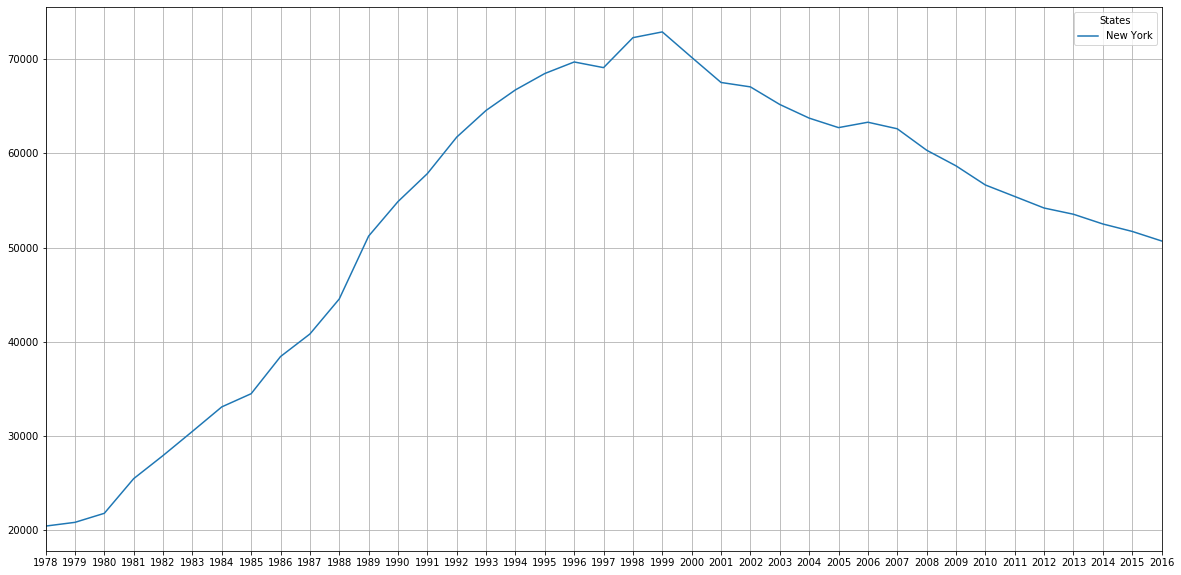

In [132]:
ny_pop_transposed.plot.line(figsize=(20,10), xticks=xticks_, grid=True)